In [ ]:
# prompt: mount drive in colab

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
import librosa

In [ ]:
path=[]
labels=[]

In [ ]:
for dirname,_,filenames in os.walk('/content/drive/MyDrive/UOT_TESS/TESS Toronto emotional speech set data'):
  for filename in filenames:
    path.append(os.path.join(dirname,filename))
    label=filename.split('_')[-1]
    label=label.split('.')[0]
    labels.append(label.lower())

In [ ]:
len(path)

2815

In [ ]:
df=pd.DataFrame()
df['speech']=path
df['label']=labels
df.head()

,speech,label
0,/content/drive/MyDrive/UOT_TESS/TESS Toronto e...,neutral
1,/content/drive/MyDrive/UOT_TESS/TESS Toronto e...,neutral
2,/content/drive/MyDrive/UOT_TESS/TESS Toronto e...,neutral
3,/content/drive/MyDrive/UOT_TESS/TESS Toronto e...,neutral
4,/content/drive/MyDrive/UOT_TESS/TESS Toronto e...,neutral


In [ ]:
df.shape

(2815, 2)

<Axes: xlabel='count', ylabel='label'>

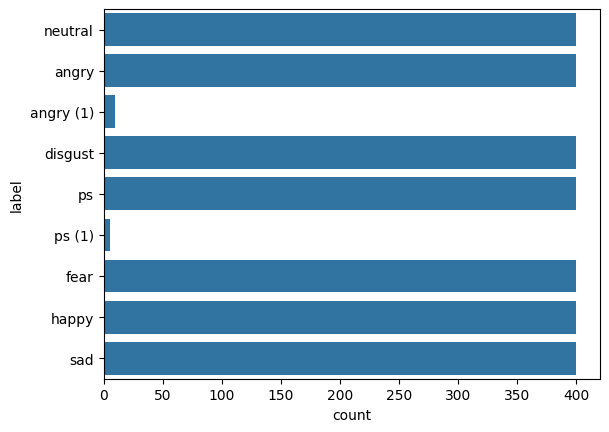

In [ ]:
import seaborn as sns
sns.countplot(df['label'])

In [ ]:
df['label'].value_counts()

,count
label,
neutral,400
angry,400
disgust,400
ps,400
fear,400
happy,400
sad,400
angry (1),10
ps (1),5


In [ ]:
df = df[~df['label'].isin(['angry (1)', 'ps (1)'])]

In [ ]:
df = df.reset_index(drop=True)

<Axes: xlabel='count', ylabel='label'>

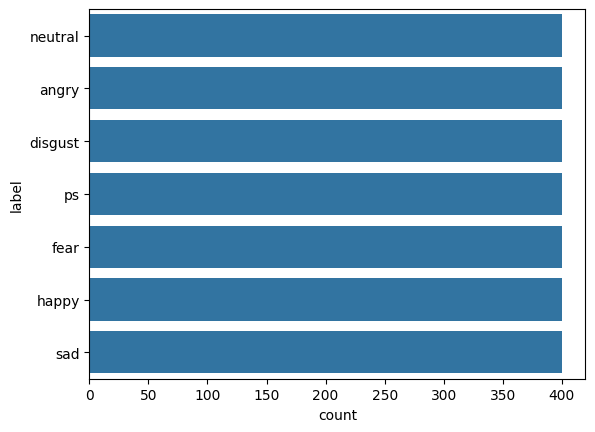

In [ ]:
sns.countplot(df['label'])

In [ ]:
def extract(filename):
  y, sr = librosa.load(filename,duration=3,offset=0.5)
  mfcc = np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40),axis=1)
  return mfcc

In [ ]:
extract(df['speech'][0])

array([-5.3149915e+02,  1.0793676e+02,  1.4124780e+01, -5.3834639e+00,
        1.6560452e+01,  1.3585376e+01, -7.3502879e+00, -4.4535398e+00,
       -1.1094629e+01,  3.4004245e+00, -7.9714818e+00,  1.5331582e+00,
       -4.7193184e+00,  5.0127878e+00,  8.9686346e+00,  2.3240485e+00,
       -9.4719543e+00,  7.1460080e+00, -1.7507105e+00, -2.4126210e+00,
        9.6247977e-01,  2.2486305e+00, -3.4595604e+00,  5.4165959e-02,
       -6.4207654e+00,  1.7633309e+00, -1.0300714e+01, -2.8313963e+00,
       -2.3983324e+00,  2.4790385e-01, -7.5464501e+00, -4.1192904e+00,
       -9.8344078e+00, -2.0136001e+00,  7.3337631e+00,  1.9198418e+01,
        3.0134661e+01,  3.5501087e+01,  3.1001858e+01,  2.1168903e+01],
      dtype=float32)

In [ ]:
a_mfcc=df['speech'].apply(lambda x: extract(x))

In [17]:
a_mfcc

,speech
0,"[-531.49915, 107.93676, 14.12478, -5.383464, 1..."
1,"[-508.27966, 60.47983, 23.018412, 13.260572, 1..."
2,"[-530.82623, 95.70294, 34.450638, 20.018412, 1..."
3,"[-525.7402, 100.4599, 25.461254, -2.8482752, 4..."
4,"[-553.5752, 106.701195, 35.995552, 8.247646, 8..."
...,...
2795,"[-454.20364, 93.66159, 14.078812, -0.9950412, ..."
2796,"[-440.55798, 111.68289, 20.59396, -6.6487627, ..."
2797,"[-463.9936, 112.54709, 26.383823, -12.737915, ..."
2798,"[-483.02118, 133.15227, 14.437027, -11.451444,..."


In [18]:
x=[x for x in a_mfcc]
x=np.array(x)
x=np.expand_dims(x, -1)
x.shape

(2800, 40, 1)

In [19]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])

In [20]:
enc.get_feature_names_out()

array(['label_angry', 'label_disgust', 'label_fear', 'label_happy',
       'label_neutral', 'label_ps', 'label_sad'], dtype=object)

In [21]:
y = y.toarray()

In [22]:
## Model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

model = Sequential()
model.add(LSTM(256, return_sequences=False, input_shape=(40,1)))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 307,655 (1.17 MB)

 Trainable params: 307,655 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history=model.fit(x, y, validation_split=0.2, epochs=5, batch_size=64)

Epoch 1/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9328 - loss: 0.2414 - val_accuracy: 0.5214 - val_loss: 4.5698
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9646 - loss: 0.1358 - val_accuracy: 0.3321 - val_loss: 6.0421
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9736 - loss: 0.1135 - val_accuracy: 0.3554 - val_loss: 4.9525
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9827 - loss: 0.0845 - val_accuracy: 0.3964 - val_loss: 5.5904
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9817 - loss: 0.0904 - val_accuracy: 0.3946 - val_loss: 7.0558


In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
acc=accuracy_score(y_true=np.argmax(y,axis=1),y_pred=np.argmax(model.predict(x),axis=1))
print(acc)

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
0.865
